<a href="https://colab.research.google.com/github/brunobro/selection-of-soybean-genotypes/blob/main/SelectionOfSoybeanGenotypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Selection of soybean genotypes subjected to drought and salt stress using Manhattan distance and TOPSIS**

**Authors:** Bruno Rodrigues de Oliveira (1), Alan Mario Zuffo (2), Jorge González Aguilera (3), Fábio Steiner (4), Sheda Méndez Ancca (5), Luis Angel Paucar Flores (6), Hebert Hernán Soto Gonzales (7)

**Corresponding author:** bruno@editorapantanal.com.br

1 Pantanal Editora, Rua Abaete, 83, Sala B, Centro. Nova Xavantina-MT, Brasil.

2 Departamento de Agronomia, Universidade Estadual do Maranhão (UEMA), Praça Gonçalves Dias, Balsas-MA, Brasil.

3 Departamento de Agronomia, Universidade Federal de Mato Grosso do Sul (UFMS), Chapadão do Sul-MS, Brasil.

4 Departamento de Agronomia, Universidade Estadual de Mato Grosso do Sul (UEMS), Unidade de Cassilândia, Rodovia MS 306 - km 6,4, Cassilândia-MS, Brasil.

5 Escuela Profesional de Ingeniería Pesquera Universidad Nacional de Moquegua (UNAM) – Ilo – Perú.

6 Facultad de Ingeniería de Industrias Alimentarias y Biotecnología Universidad Nacional de Frontera (UNF) - Sullana, Perú. 

7 Laboratorio de Biología Molecular y Biotecnología Escuela Profesional de Ingeniería Ambiental Universidad Nacional de Moquegua (UNAM) – Ilo – Perú.






In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from scipy.spatial import distance

In [ ]:
#Variables
Vars = ['GERM', 'SL', 'RL', 'TL', 'SDM', 'RDM', 'TDM']

#Normalizes each variable
def norm(df):
    df = df.copy() #Avoid overriding the original dataframe
    for col in Vars:
        df[col] = df[col] / df[col].max()
    return df

#Read data
df = pd.read_csv('data.csv')
del df['Exp'] #Not used

#Cultivars
cultivars = np.unique(df['CULTIVAR'])

#Split by class
df_control_ = df[df['CLASS'] == 'Control']
df_saline_  = df[df['CLASS'] == 'Saline']
df_drought_ = df[df['CLASS'] == 'Drought']

#Calculate the average value of experiments
df_control_ = df_control_.groupby(['CULTIVAR'], as_index=False).mean()
df_saline_  = df_saline_.groupby(['CULTIVAR'], as_index=False).mean()
df_drought_ = df_drought_.groupby(['CULTIVAR'], as_index=False).mean()

#Normalize
df_control = norm(df_control_)
df_saline  = norm(df_saline_)
df_drought = norm(df_drought_)

#Show an example
display(df_saline)

,CULTIVAR,GERM,SL,RL,TL,SDM,RDM,TDM
0,5D 615 RR,1.000000,0.707657,0.499002,0.595494,0.781616,0.703037,0.796882
1,5D 6215 IPRO,0.958763,0.890951,0.646707,0.758584,0.795805,0.717660,0.811631
2,5D 690 RR,0.690722,0.596288,0.700599,0.651288,0.752622,0.668166,0.764433
3,5G 770 RR,0.845361,0.582367,0.780439,0.688841,0.621221,0.616423,0.655289
4,5G 830 RR,0.969072,0.770302,0.467066,0.606223,0.760642,0.575928,0.735356
...,...,...,...,...,...,...,...,...
65,TMG 2381 IPRO,0.896907,0.744780,0.678643,0.709227,0.851943,0.552306,0.789296
66,TMG 7061 IPRO,0.855670,0.487239,0.469062,0.477468,0.653300,0.835771,0.759376
67,TMG 7063 IPRO,0.793814,0.477958,0.461078,0.468884,0.678593,0.745782,0.742520
68,TMG 7067 IPRO,0.907216,0.737819,0.582834,0.654506,0.893893,0.959505,0.970080


# Manhattan Distance

This approach will compare the distances of the control samples for those stressed in relation to those cultivars that were selected as more stable in the original article.

In [ ]:
def dist(x, y):
    return distance.cityblock(x, y)
    
#Calcula todas as distâncias
distances = []

for cultivar in cultivars:

    sel1_control = np.array(df_control[df_control['CULTIVAR'] == cultivar])[0][1:]
    sel1_saline  = np.array(df_saline[df_saline['CULTIVAR'] == cultivar])[0][1:]
    sel1_drought = np.array(df_drought[df_drought['CULTIVAR'] == cultivar])[0][1:]

    dcs = dist(sel1_control, sel1_saline)
    dcd = dist(sel1_control, sel1_drought)

    distances.append([dcs, dcd])

    #print('Control/Saline: %.4f' %dcs)
    #print('Control/Drought: %.4f' %dcd)
    #print('\n')

distances = np.array(distances)

#df_dist = pd.DataFrame(data=np.array([distances[:,0], distances[:,1]]).T, columns=['Control/Saline','Control/Drought'])
#df_dist.to_excel("matrix.xlsx")

#TOPSIS

Apply TOPSIS method using the obtained distances as evaluation matrix

In [ ]:
!pip install topsis-jamesfallon

In [ ]:
from topsis import topsis

decision = topsis(distances, [0.5, 0.5], [0, 0])
decision.calc()

print('Melhor cultivar: ', cultivars[decision.optimum_choice])

Melhor cultivar:  RK 6813 RR


In [ ]:
#Data with distances and similarities obtained by TOPSIS
data = np.array([cultivars, distances[:,0], distances[:,1], decision.C]).T

df_all = pd.DataFrame(data=data, columns=['CULTIVAR','Control/Saline','Control/Drought','TOPSIS Score'])

display(df_all)

,CULTIVAR,Control/Saline,Control/Drought,TOPSIS Score
0,5D 615 RR,0.884752,0.816399,0.795899
1,5D 6215 IPRO,0.743933,0.655089,0.855516
2,5D 690 RR,0.60891,1.027338,0.806049
3,5G 770 RR,0.37878,0.979588,0.842633
4,5G 830 RR,0.52981,0.715811,0.891193
...,...,...,...,...
65,TMG 2381 IPRO,1.100597,1.54937,0.606951
66,TMG 7061 IPRO,0.636045,0.765795,0.860273
67,TMG 7063 IPRO,0.572324,1.245379,0.759624
68,TMG 7067 IPRO,0.588959,1.007707,0.813566


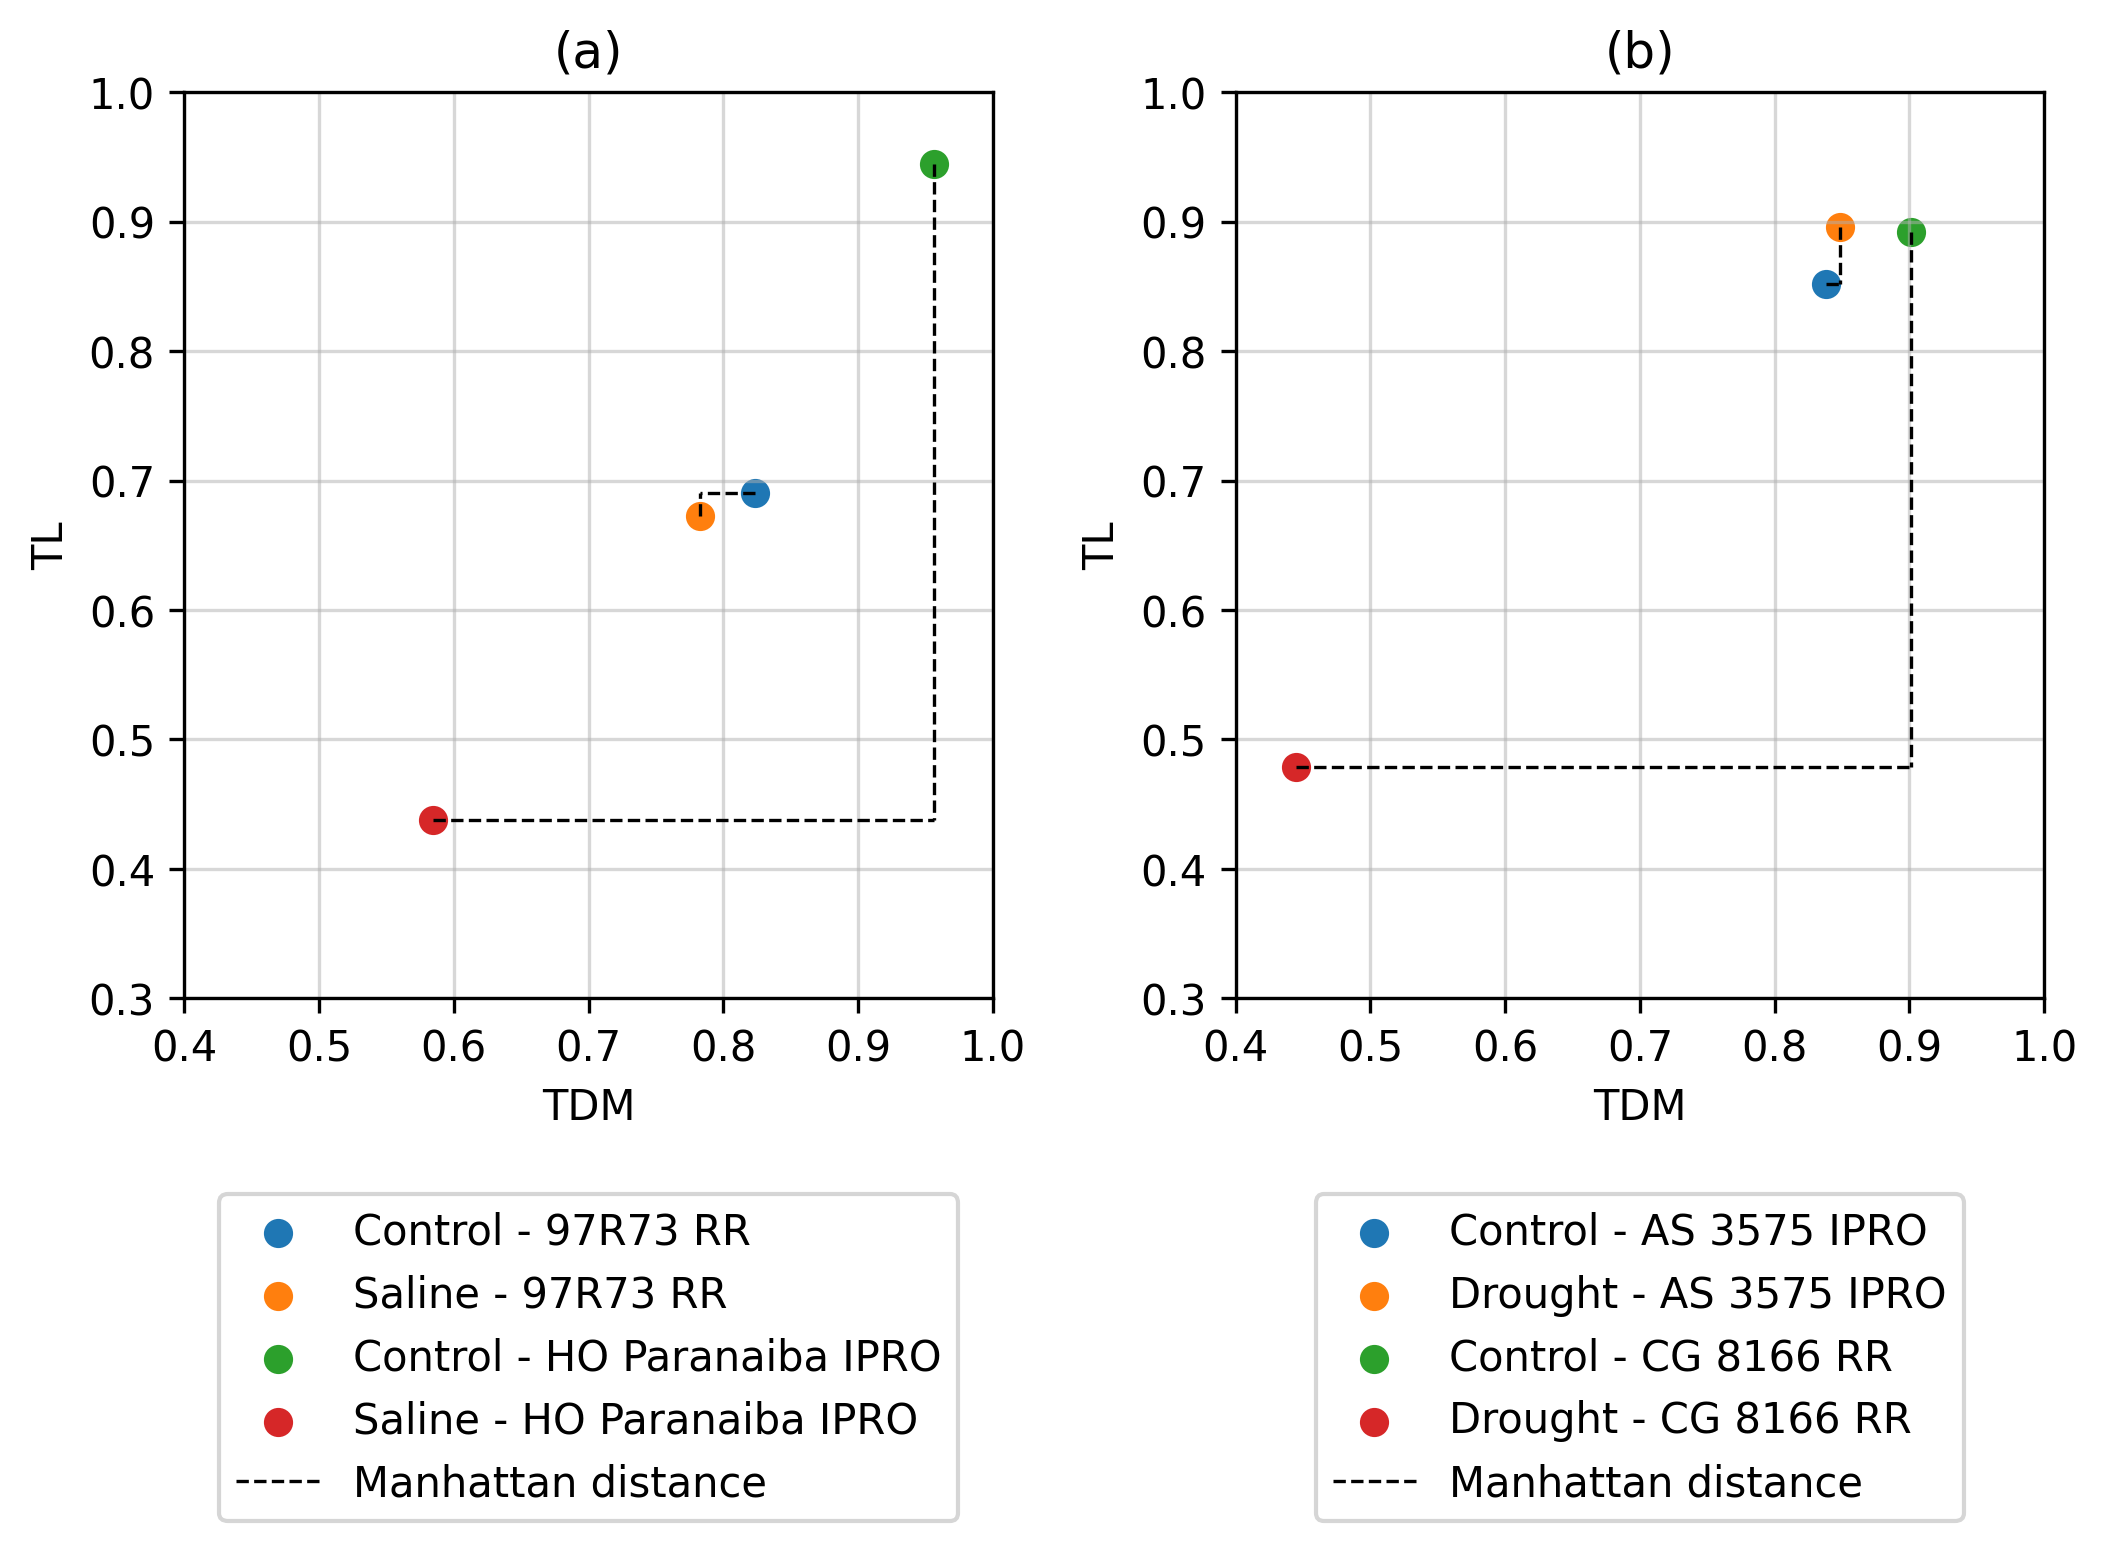

In [ ]:
#Plot a figure to illustrate the distance between the best and the worst cultivar in relation to saline stress
#Compares only two variables: TDM and TL
df_control_97R73_RR          = df_control[df_control['CULTIVAR'] == '97R73 RR']
df_control_HO_Paranaiba_IPRO = df_control[df_control['CULTIVAR'] == 'HO Paranaiba IPRO']
df_control_AS_3575_IPRO      = df_control[df_control['CULTIVAR'] == 'AS 3575 IPRO']
df_control_CG_8166_RR        = df_control[df_control['CULTIVAR'] == 'CG 8166 RR']

df_best_saline  = df_saline[df_saline['CULTIVAR'] == '97R73 RR']
df_worst_saline = df_saline[df_saline['CULTIVAR'] == 'HO Paranaiba IPRO']

df_best_drought  = df_drought[df_drought['CULTIVAR'] == 'AS 3575 IPRO']
df_worst_drought = df_drought[df_drought['CULTIVAR'] == 'CG 8166 RR']

plt.figure(dpi=300, figsize=(8,4))
plt.subplot(121)
plt.title('(a)')
plt.xlabel('TDM')
plt.ylabel('TL')
plt.scatter(df_control_97R73_RR['TDM'], df_control_97R73_RR['TL'], label='Control - 97R73 RR')
plt.scatter(df_best_saline['TDM'], df_best_saline['TL'], label='Saline - 97R73 RR')

plt.hlines(df_control_97R73_RR  ['TL'], df_control_97R73_RR['TDM'], df_best_saline['TDM'], linestyles='dashed', color='k', linewidth=0.8)
plt.vlines(df_best_saline['TDM'], df_best_saline['TL'], df_control_97R73_RR['TL'], linestyles='dashed', color='k', linewidth=0.8)

plt.scatter(df_control_HO_Paranaiba_IPRO['TDM'], df_control_HO_Paranaiba_IPRO['TL'], label='Control - HO Paranaiba IPRO')
plt.scatter(df_worst_saline['TDM'], df_worst_saline['TL'], label='Saline - HO Paranaiba IPRO')

plt.vlines(df_control_HO_Paranaiba_IPRO['TDM'], df_control_HO_Paranaiba_IPRO['TL'], df_worst_saline['TL'], linestyles='dashed', color='k', linewidth=0.8)
plt.hlines(df_worst_saline['TL'], df_worst_saline['TDM'], df_control_HO_Paranaiba_IPRO['TDM'], linestyles='dashed', color='k', linewidth=0.8, label='Manhattan distance')

plt.ylim((0.3, 1.0))
plt.xlim((0.4, 1.0))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6))
plt.grid(alpha=0.5)

plt.subplot(122)
plt.title('(b)')
plt.xlabel('TDM')
plt.ylabel('TL')
plt.scatter(df_control_AS_3575_IPRO['TDM'], df_control_AS_3575_IPRO['TL'], label='Control - AS 3575 IPRO')
plt.scatter(df_best_drought['TDM'], df_best_drought['TL'], label='Drought - AS 3575 IPRO')

plt.hlines(df_control_AS_3575_IPRO['TL'], df_control_AS_3575_IPRO['TDM'], df_best_drought['TDM'], linestyles='dashed', color='k', linewidth=0.8)
plt.vlines(df_best_drought['TDM'], df_best_drought['TL'], df_control_AS_3575_IPRO['TL'], linestyles='dashed', color='k', linewidth=0.8)

plt.scatter(df_control_CG_8166_RR['TDM'], df_control_CG_8166_RR['TL'], label='Control - CG 8166 RR')
plt.scatter(df_worst_drought['TDM'], df_worst_drought['TL'], label='Drought - CG 8166 RR')

plt.vlines(df_control_CG_8166_RR['TDM'], df_control_CG_8166_RR['TL'], df_worst_drought['TL'], linestyles='dashed', color='k', linewidth=0.8)
plt.hlines(df_worst_drought['TL'], df_worst_drought['TDM'], df_control_CG_8166_RR['TDM'], linestyles='dashed', color='k', linewidth=0.8, label='Manhattan distance')

plt.ylim((0.3, 1.0))
plt.xlim((0.4, 1.0))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6))
plt.grid(alpha=0.5)

plt.subplots_adjust(wspace=0.3)

#plt.tight_layout()
plt.show()

In [ ]:
#To generate a graph with the values
K = len(cultivars)
data1 = np.array([cultivars, distances[:,0], K*['Control/Saline']]).T
data2 = np.array([cultivars, distances[:,1], K*['Control/Drought']]).T
data3 = np.array([cultivars, decision.C    , K*['TOPSIS score']]).T

df1 = pd.DataFrame(data=data1, columns=['CULTIVAR','Measure','Value'])
df2 = pd.DataFrame(data=data2, columns=['CULTIVAR','Measure','Value'])
df3 = pd.DataFrame(data=data3, columns=['CULTIVAR','Measure','Value'])

df = pd.concat([df1, df2, df3])

#display(df)

Text(0.5, 0, 'Distance or score')

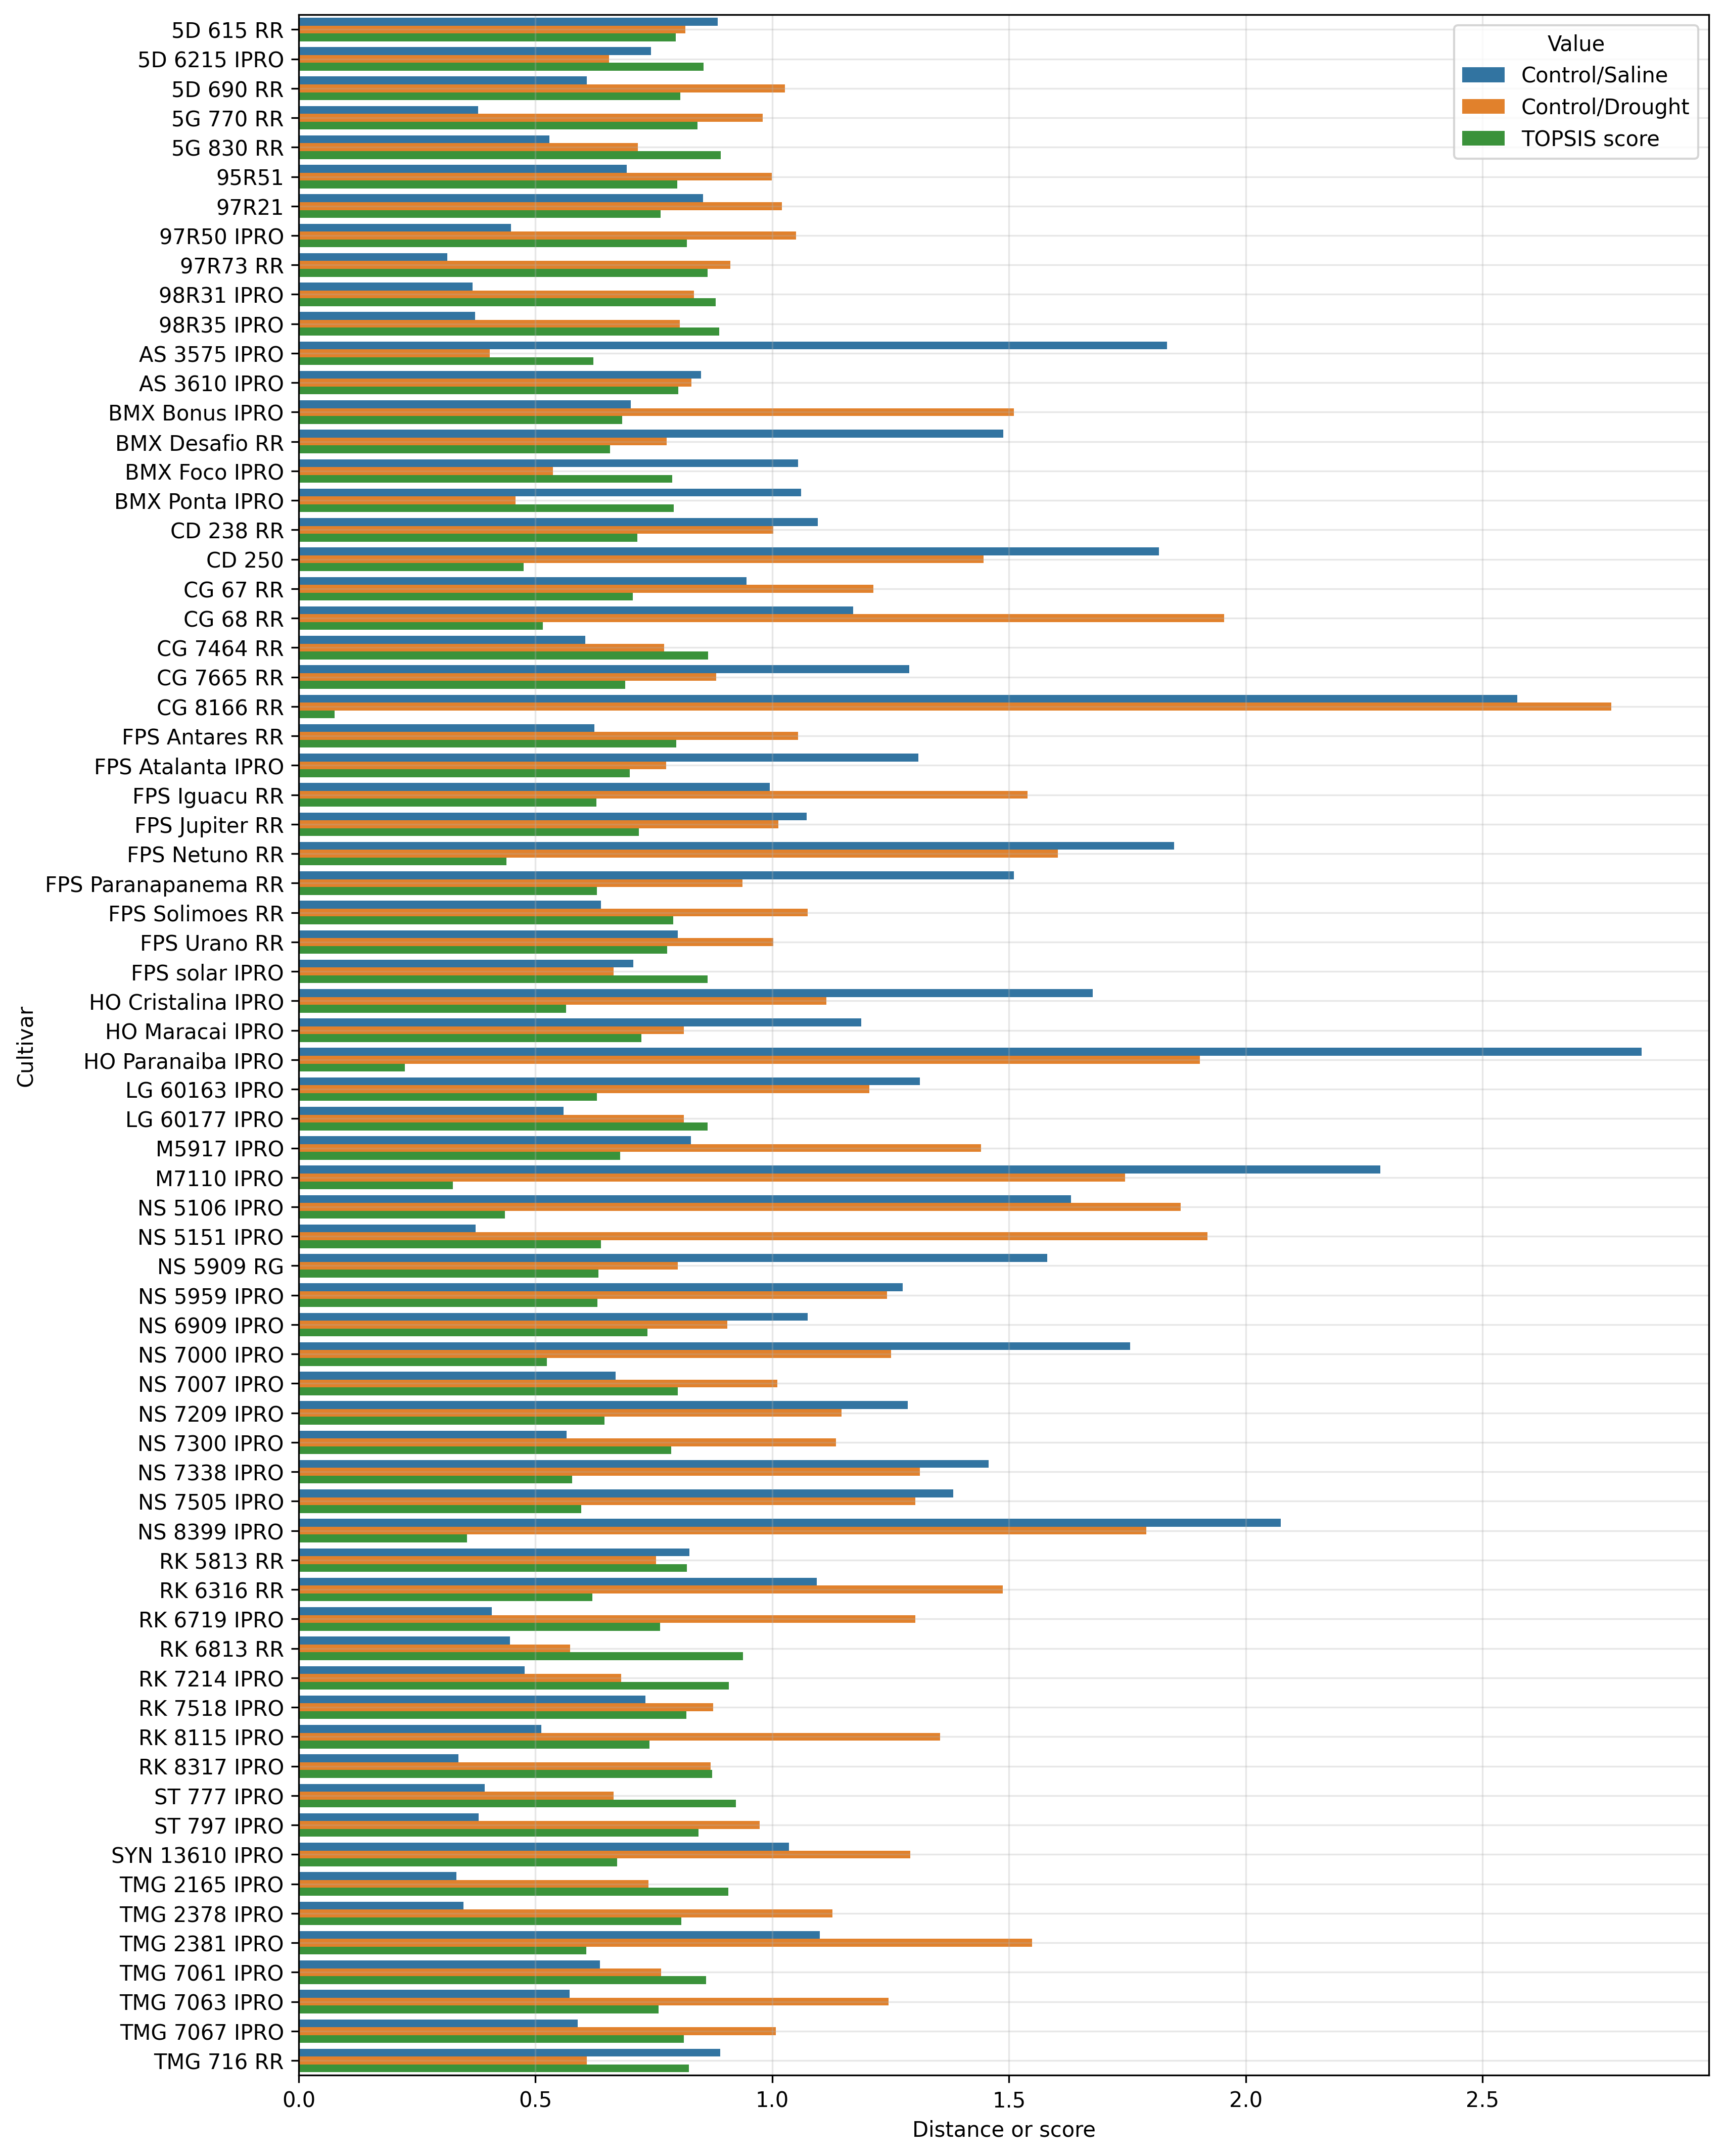

In [ ]:
#Bar chart with all values
plt.figure(dpi=300, figsize=(12,18))
sns.barplot(x='Measure', y='CULTIVAR', hue='Value', data=df)
plt.grid(alpha=0.3)
plt.ylabel('Cultivar')
plt.xlabel('Distance or score')

In [ ]:
#Varies the weights of the criteria (distances in each stressed environment)
#and check how topsis score changes to the 10 best cultivars

for w_s in np.arange(0.1, 1, 0.2):
    # w_s is the weight for control/saline
    w_d = 1 - w_s #weight for control/drought

    #Apply TOPSIS with new weights
    decision = topsis(distances, [w_s, w_d], [0, 0])
    decision.calc()

    #Data with distances and similarities obtained by TOPSIS
    data = np.array([cultivars, decision.C]).T

    df_ = pd.DataFrame(data=data, columns=['CULTIVAR','TOPSIS Score'])

    print('Weight Control/Seline: ', w_s)
    print(df_.sort_values(by=['TOPSIS Score'], ascending=False).head(10).to_string(index=False))


Weight Control/Seline:  0.1
      CULTIVAR TOPSIS Score
BMX Ponta IPRO     0.958131
 BMX Foco IPRO     0.934061
  AS 3575 IPRO     0.931507
    RK 6813 RR     0.928496
    TMG 716 RR     0.910098
  5D 6215 IPRO     0.892564
   ST 777 IPRO     0.890394
FPS solar IPRO     0.888954
  RK 7214 IPRO     0.883626
     5G 830 RR     0.868704
Weight Control/Seline:  0.30000000000000004
      CULTIVAR TOPSIS Score
    RK 6813 RR      0.93135
   ST 777 IPRO     0.899754
  RK 7214 IPRO     0.890831
FPS solar IPRO      0.88029
  5D 6215 IPRO     0.879818
BMX Ponta IPRO     0.879423
    TMG 716 RR     0.876854
     5G 830 RR     0.875404
 TMG 2165 IPRO     0.873556
 BMX Foco IPRO     0.870069
Weight Control/Seline:  0.5000000000000001
     CULTIVAR TOPSIS Score
   RK 6813 RR      0.93801
  ST 777 IPRO     0.923037
 RK 7214 IPRO     0.908142
TMG 2165 IPRO     0.907371
    5G 830 RR     0.891193
   98R35 IPRO     0.887896
   98R31 IPRO     0.880542
 RK 8317 IPRO     0.872881
   CG 7464 RR     0.865064

In [ ]:
#Bar chart to compare the variables of the 4 best genotypes
best_gen  = ['RK 6813 RR', 'ST 777 IPRO', 'RK 7214 IPRO', 'TMG 2165 IPRO']
worst_gen = ['CG 8166 RR', 'HO Paranaiba IPRO',	'M7110 IPRO', 'NS 8399 IPRO']
letter    = ['a','b','c','d']

for list_gen in [best_gen, worst_gen]:
    print('-------------------------------------------------------------------')

    for i, gen in enumerate(list_gen):

        f, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=300, figsize=(4,5), sharex=True)
        plt.suptitle('(' + letter[i] + ')')
        
        #Select the original data (without standardization) to register
        df_sel_control = df_control_[df_control_['CULTIVAR'] == gen]
        df_sel_saline  = df_saline_[df_saline_['CULTIVAR'] == gen]
        df_sel_drought = df_drought_[df_drought_['CULTIVAR'] == gen]

        del df_sel_control['CULTIVAR']
        del df_sel_saline['CULTIVAR']
        del df_sel_drought['CULTIVAR']

        g1 = sns.barplot(data=df_sel_control, ax=ax1, palette="rocket")
        ax1.axhline(0, color="k", clip_on=False)
        ax1.set_ylabel("Control")
        plt.ylim((0, 100))
        ax1.grid(alpha=0.3)

        g2 = sns.barplot(data=df_sel_saline, ax=ax2, palette="rocket")
        ax2.axhline(0, color="k", clip_on=False)
        ax2.set_ylabel("Saline")
        plt.ylim((0, 100))
        ax2.grid(alpha=0.3)

        g3 = sns.barplot(data=df_sel_drought, ax=ax3, palette="rocket")
        ax3.axhline(0, color="k", clip_on=False)
        ax3.set_ylabel("Drought")
        plt.ylim((0, 100))
        ax3.grid(alpha=0.3)

        sns.despine(bottom=True)
        plt.tight_layout(h_pad=2)
        plt.show()
    

-------------------------------------------------------------------
Control/Saline
        GERM         SL         RL        TL        SDM        RDM        TDM
55  3.030303  40.963855  30.698529  36.34106  25.788114  28.728414  26.544889
Control/Drought
        GERM         SL         RL         TL       SDM       RDM       TDM
55  5.555556  71.686747 -10.294118  34.768212  86.30491 -0.313972  64.90478


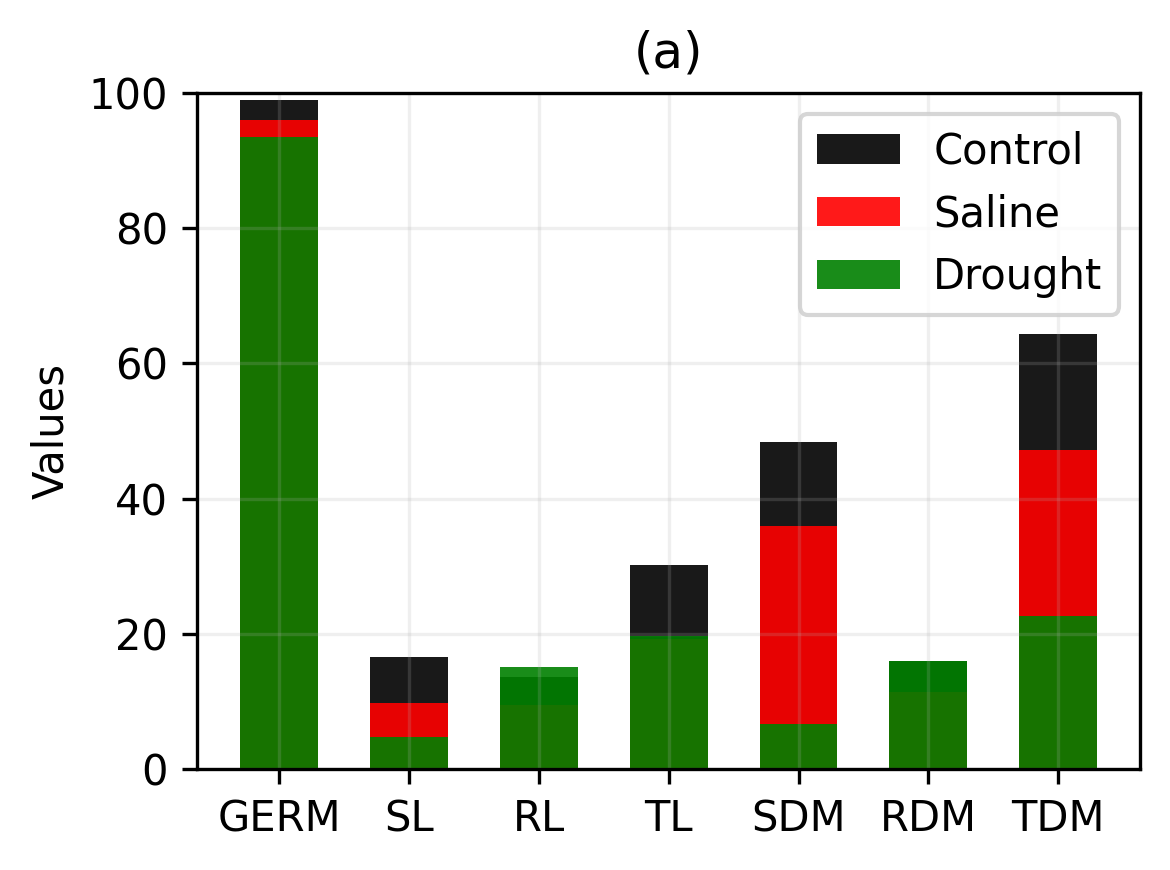

Control/Saline
    GERM        SL         RL         TL        SDM        RDM        TDM
60  12.0  47.13467  26.642984  37.985726  28.353254 -18.435754  19.280344
Control/Drought
    GERM         SL         RL         TL        SDM       RDM        TDM
60  10.0  65.100287 -12.433393  30.483743  83.944223 -58.49162  56.552095


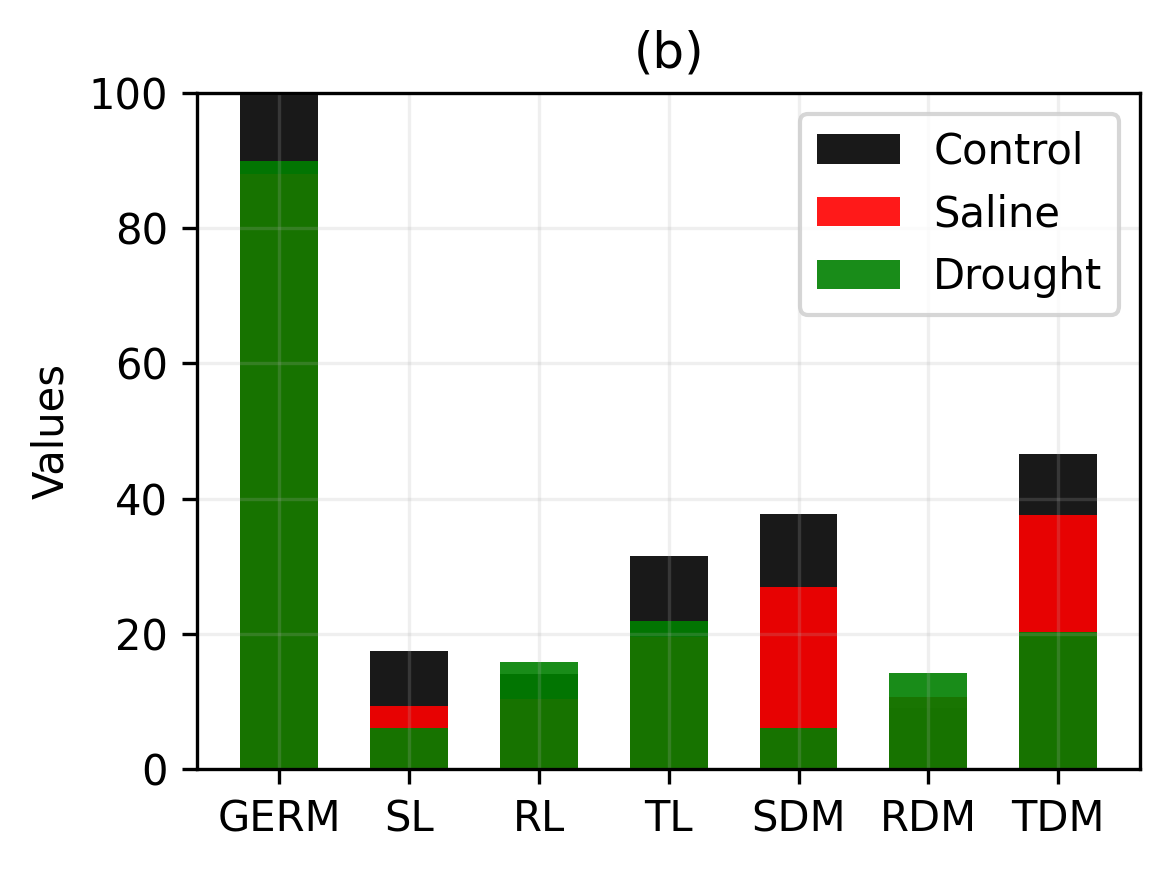

Control/Saline
         GERM         SL         RL         TL        SDM        RDM  \
56  17.708333  41.698842  15.957447  30.872483  27.126556  17.576792   

          TDM  
56  24.970179  
Control/Drought
         GERM        SL         RL         TL        SDM       RDM        TDM
56  18.229167  70.27027 -14.361702  34.675615  87.448133  5.631399  68.429423


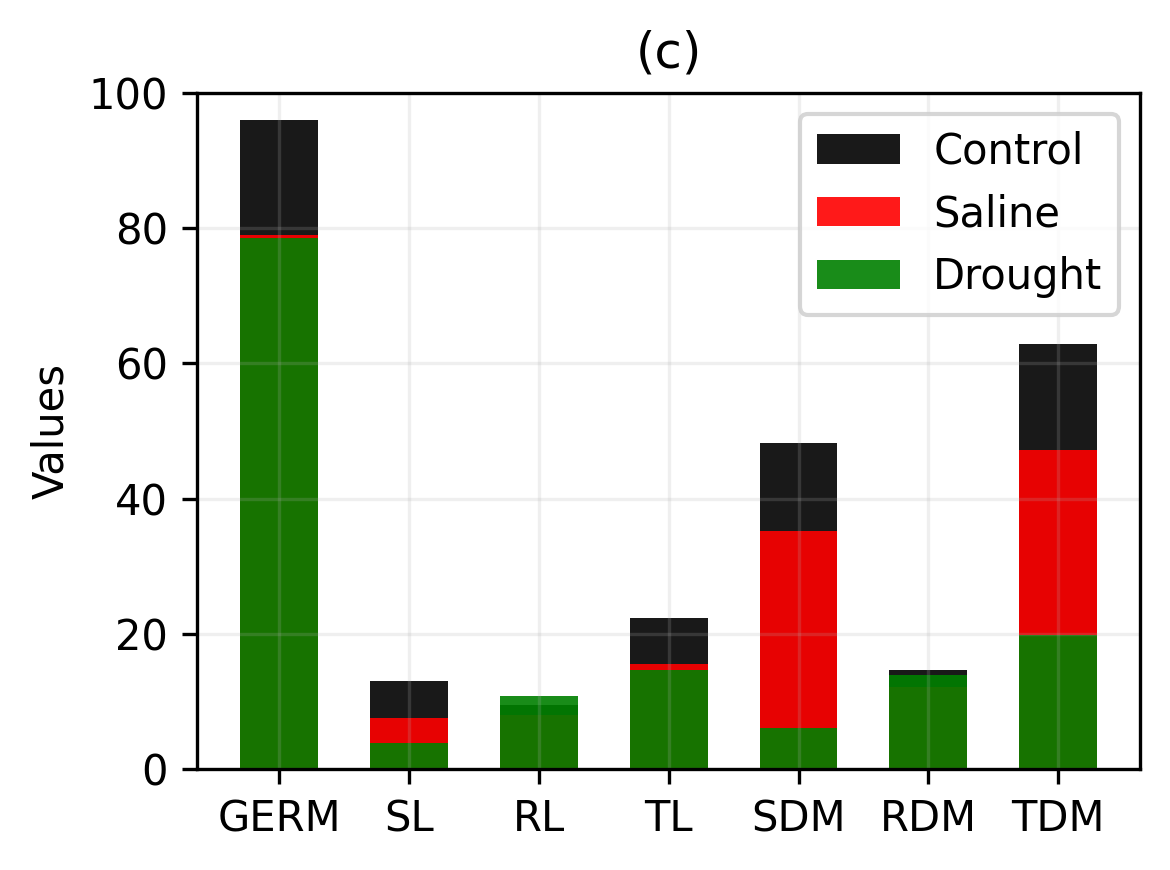

Control/Saline
         GERM         SL         RL         TL        SDM      RDM        TDM
63  17.346939  47.874016  18.019802  34.649123  37.377584  3.10559  28.554168
Control/Drought
        GERM         SL         RL         TL        SDM        RDM        TDM
63  6.122449  84.031496 -17.148515  39.219298  85.620239 -11.071429  60.571889


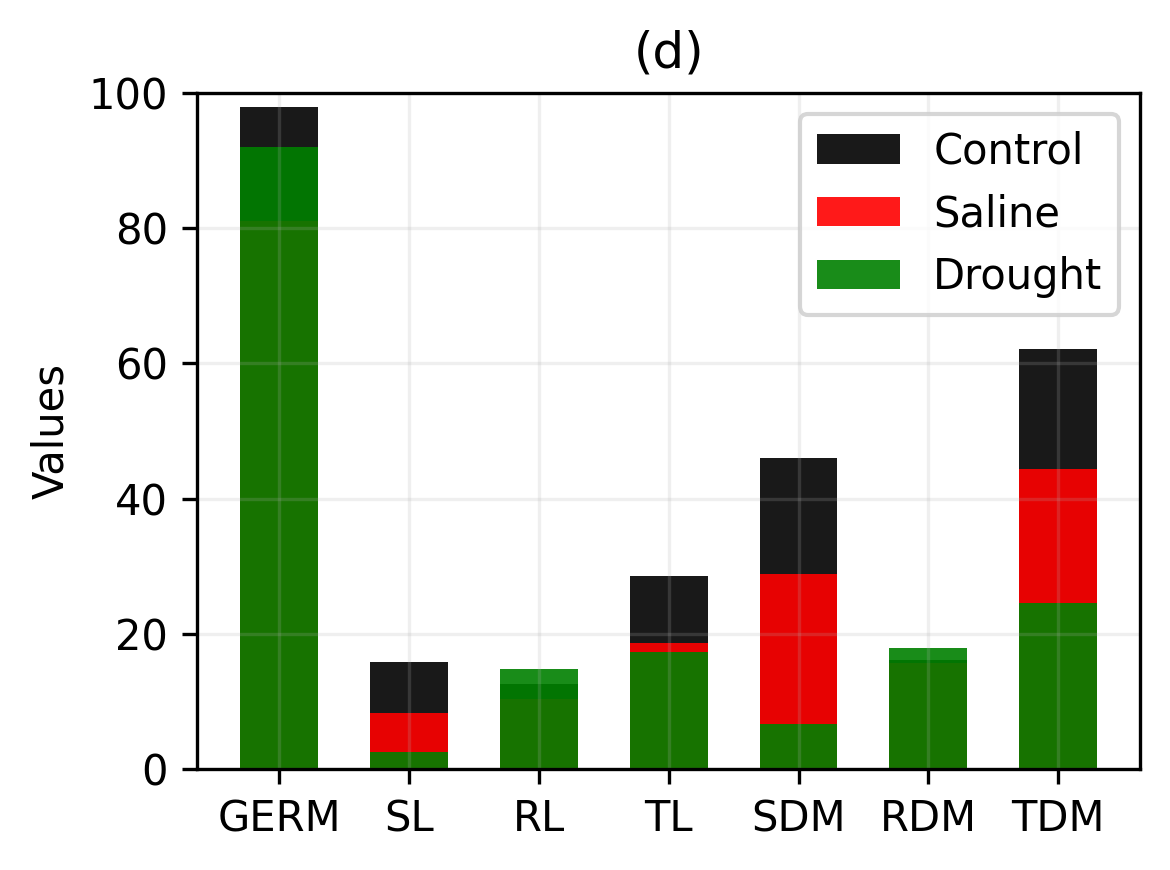

-------------------------------------------------------------------
Control/Saline
    GERM         SL         RL         TL   SDM        RDM        TDM
23  23.0  64.841499  71.379898  67.993755  57.5  47.082228  54.766875
Control/Drought
    GERM         SL         RL         TL        SDM       RDM        TDM
23  14.0  84.149856  40.374787  64.090554  92.311321  46.02122  80.201809


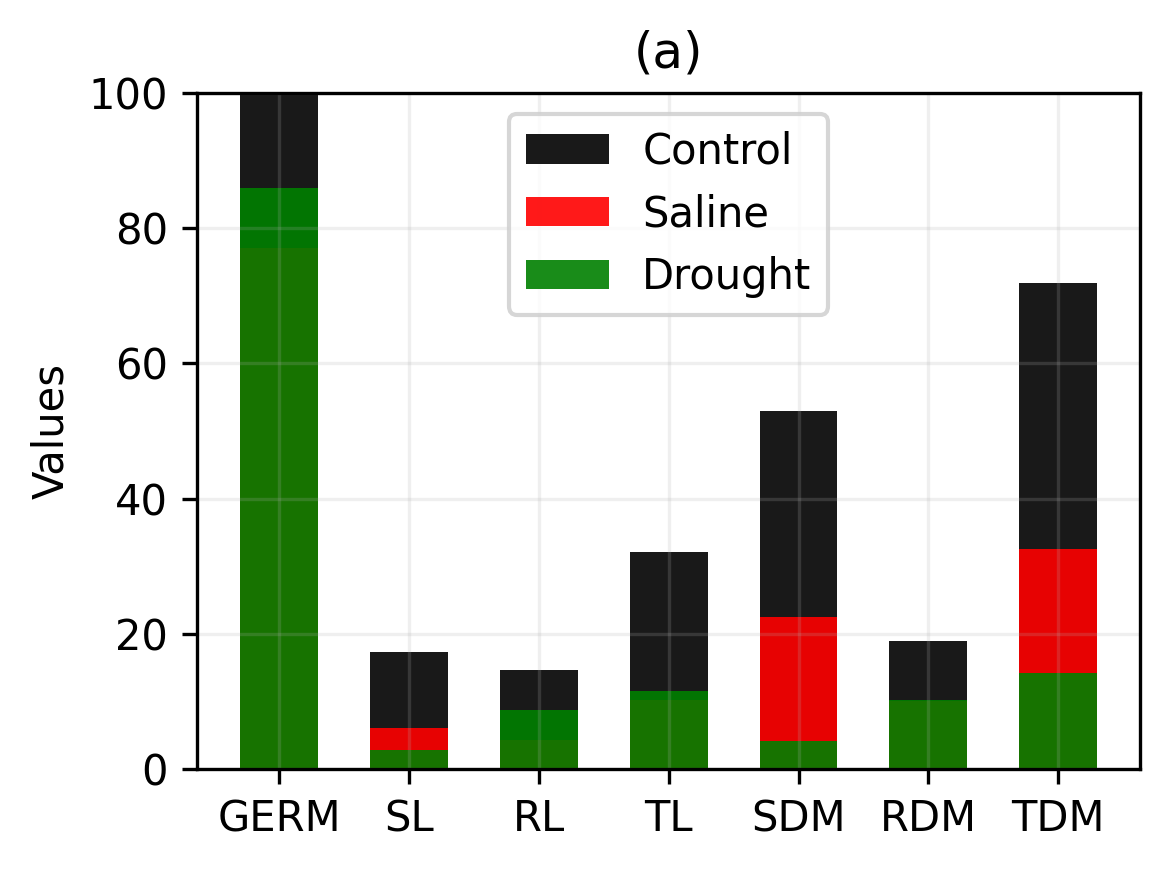

Control/Saline
         GERM         SL         RL         TL        SDM        RDM  \
35  29.591837  74.538259  63.879599  69.911504  59.423503  40.428212   

          TDM  
35  54.476878  
Control/Drought
         GERM         SL         RL        TL        SDM        RDM        TDM
35  12.244898  83.324538  13.210702  52.40413  90.452328  14.156171  70.580518


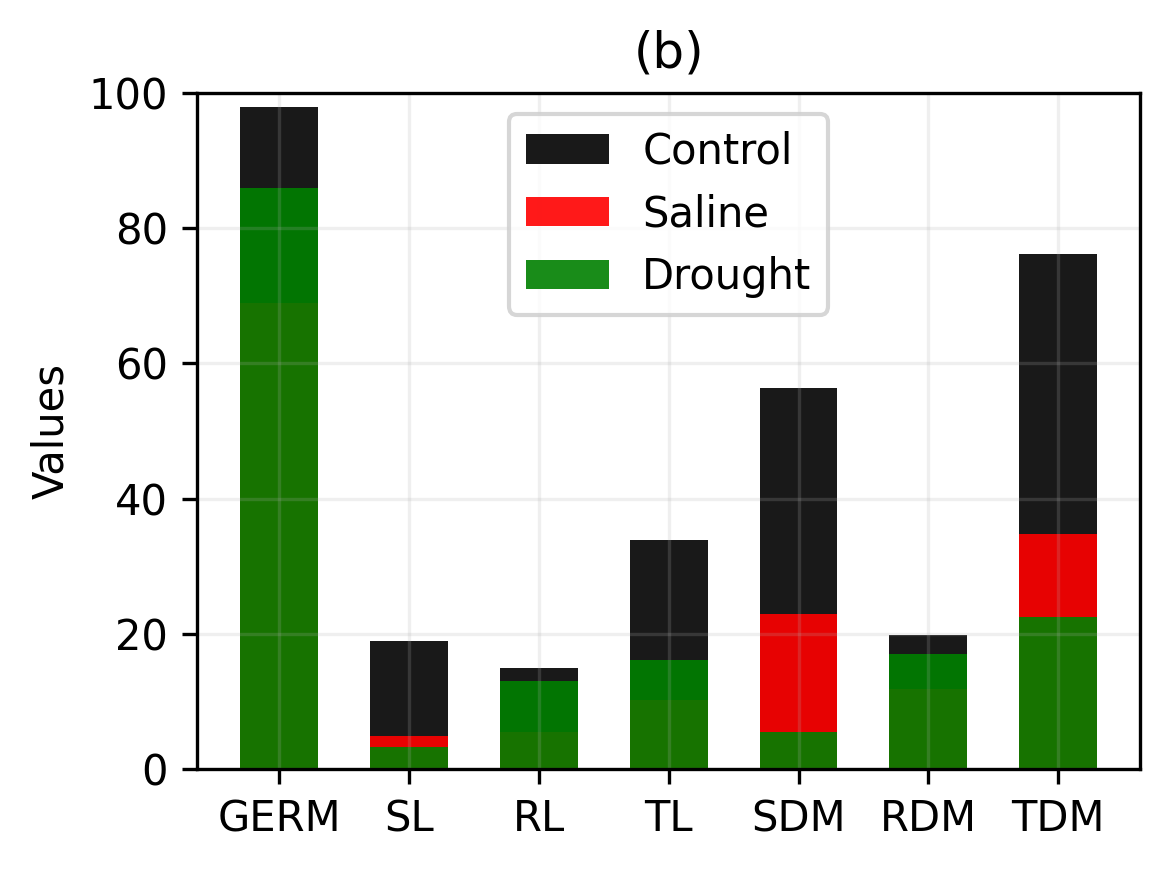

Control/Saline
        GERM         SL         RL         TL        SDM       RDM        TDM
39  4.166667  63.193277  61.440678  62.417994  61.781483  52.69527  59.159348
Control/Drought
     GERM         SL         RL        TL      SDM        RDM        TDM
39  3.125  76.134454  29.025424  55.29522  91.2681  21.012101  71.235885


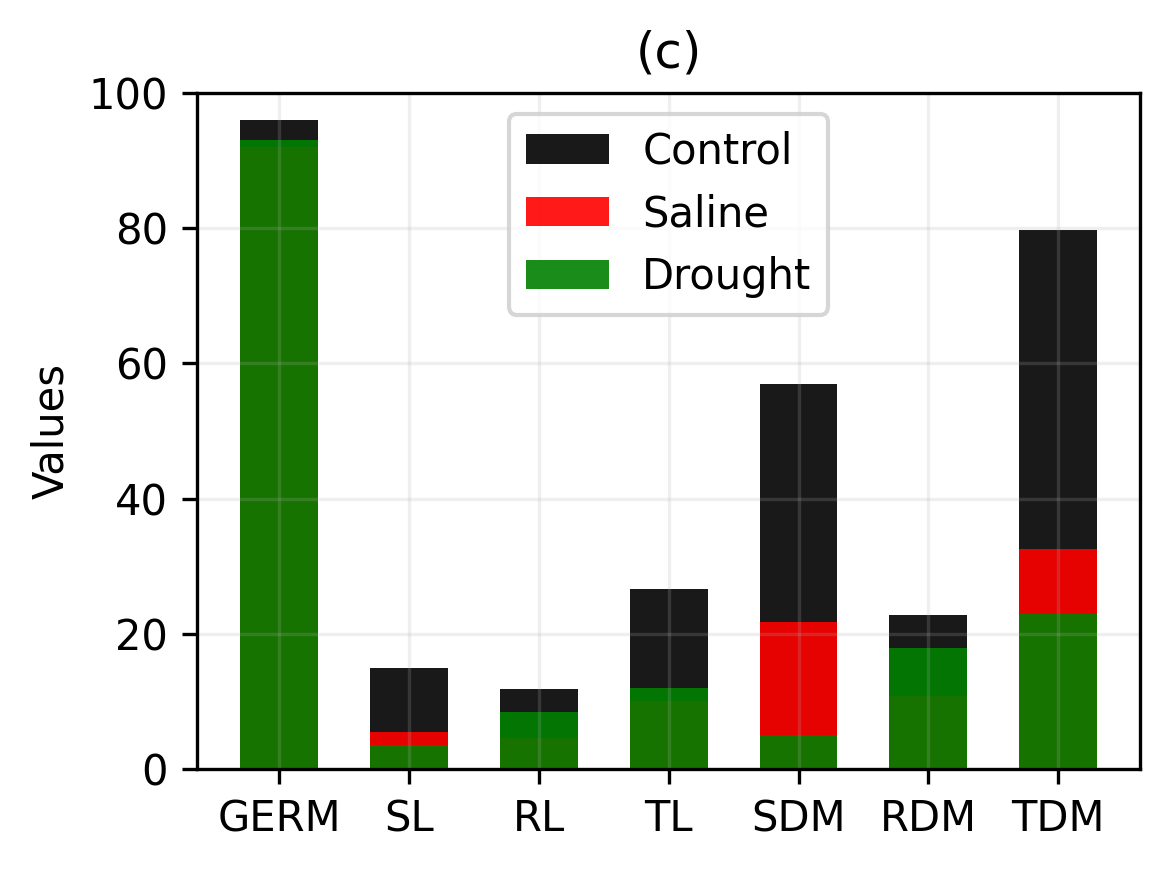

Control/Saline
         GERM         SL         RL         TL        SDM        RDM  \
51  21.428571  75.409836  56.115108  66.266094  64.443155  19.704433   

          TDM  
51  52.827763  
Control/Drought
         GERM         SL         RL         TL        SDM        RDM  \
51  19.387755  84.131148  23.201439  55.038627  88.451276  28.883415   

          TDM  
51  72.922022  


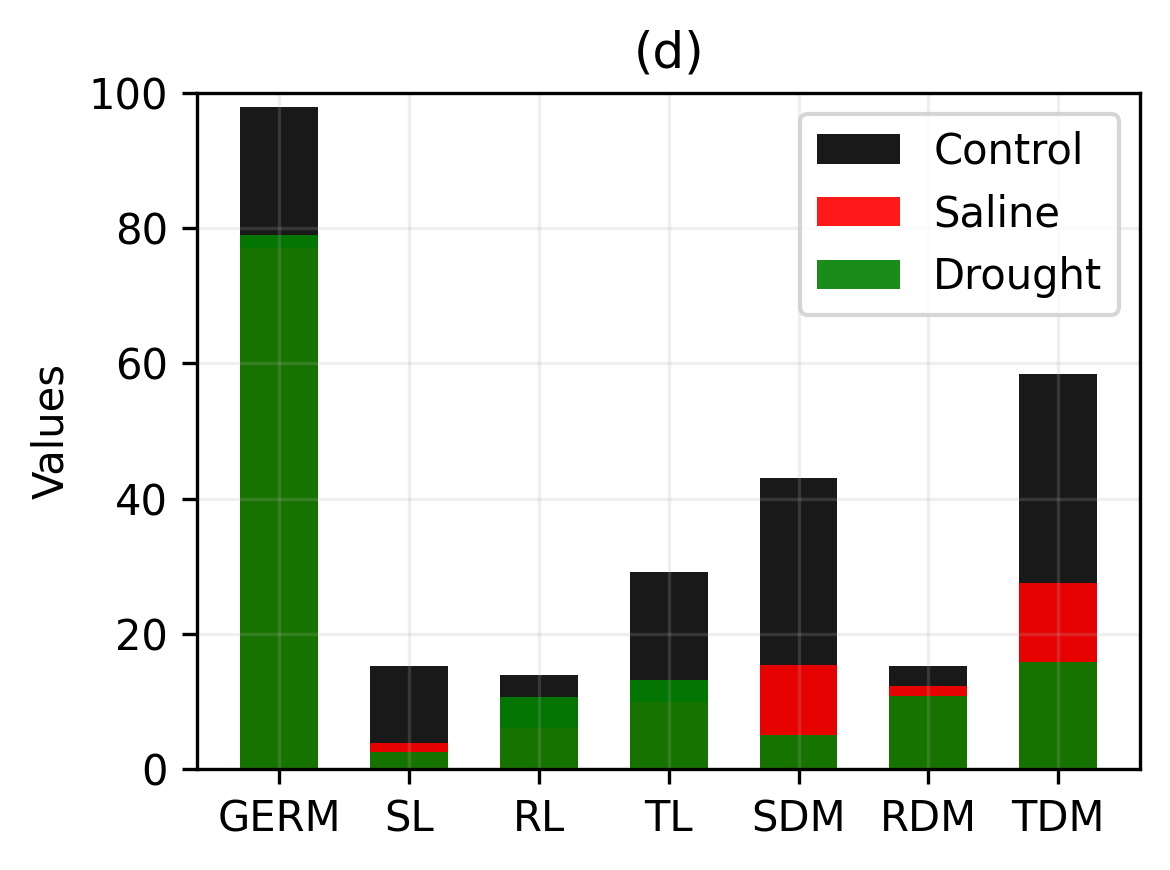

In [ ]:
#Bar chart to compare the variables of the 4 best genotypes
best_gen  = ['RK 6813 RR', 'ST 777 IPRO', 'RK 7214 IPRO', 'TMG 2165 IPRO']
worst_gen = ['CG 8166 RR', 'HO Paranaiba IPRO',	'M7110 IPRO', 'NS 8399 IPRO']
letter    = ['a','b','c','d']

width = 0.6

for list_gen in [best_gen, worst_gen]:
    print('-------------------------------------------------------------------')

    for i, gen in enumerate(list_gen):

        fig, ax = plt.subplots(dpi=300, figsize=(4,3), sharex=True)
        ax.set_title('(' + letter[i] + ')')
        
        #Select the original data (without standardization) to register
        df_sel_control = df_control_[df_control_['CULTIVAR'] == gen]
        df_sel_saline  = df_saline_[df_saline_['CULTIVAR'] == gen]
        df_sel_drought = df_drought_[df_drought_['CULTIVAR'] == gen]

        del df_sel_control['CULTIVAR']
        del df_sel_saline['CULTIVAR']
        del df_sel_drought['CULTIVAR']

        #Calculates percentage differences
        df_diff_control_saline   = ((df_sel_control - df_sel_saline) / df_sel_control) * 100
        df_diff_control_drought  = ((df_sel_control - df_sel_drought ) / df_sel_control) * 100

        print('Control/Saline')
        print(df_diff_control_saline )
        print('Control/Drought')
        print(df_diff_control_drought )

        labels = list(df_sel_control.columns)

        ax.bar(labels, np.array(df_sel_control)[0,:], width, label='Control', alpha=0.9, color='k')
        ax.bar(labels, np.array(df_sel_saline)[0,:], width, label='Saline', alpha=0.9, color='r')
        ax.bar(labels, np.array(df_sel_drought)[0,:], width, label='Drought', alpha=0.9, color='g')
        ax.grid(alpha=0.2)
        plt.ylim((0, 100))
        ax.legend()
        ax.set_ylabel('Values')

        plt.tight_layout()
        plt.show()
    